# 基于Python学习量子信息学

In [2]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from qutip import *


## Qutip的量子对象类 (Qobj class)

### 空对象 (black)

In [15]:
black = Qobj()  # [[0.]]

### 行向量（bra）

In [6]:
x = np.array([[1, 2, 3, 4, 5]]) 
A = Qobj(x) # 行向量（bra） 

Quantum object: dims = [[1], [5]], shape = (1, 5), type = bra
Qobj data =
[[1. 2. 3. 4. 5.]]


### 列向量（ket）

In [10]:
A_dag = A.dag()

### 方阵 （square matrix）

In [11]:
sm = np.random.rand(4, 4)
X = Qobj(sm) 

In [180]:
Y = num(4)
print(Y) 

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 2. 0.]
 [0. 0. 0. 3.]]


### 量子对象的属性
- .data:  Matrix representing state or operator
- .dims:  List keeping track of shapes for individual components of a multipartite system (for tensor products and partial traces).
- .shape: Dimensions of underlying data matrix.
- .isherm: Is the operator Hermitian or not?
- .type: Is object of type ‘ket, ‘bra’, ‘oper’, or ‘super’?

In [84]:
X.data # 这是个4x4的按行压缩的稀疏矩阵！

<4x4 sparse matrix of type '<class 'numpy.complex128'>'
	with 16 stored elements in Compressed Sparse Row format>

In [135]:
X.data.toarray()

array([[0.44532274+0.j, 0.77584838+0.j, 0.69699833+0.j, 0.4000973 +0.j],
       [0.12977727+0.j, 0.1822291 +0.j, 0.48596961+0.j, 0.01884586+0.j],
       [0.63587424+0.j, 0.85399824+0.j, 0.52122033+0.j, 0.16471016+0.j],
       [0.83449761+0.j, 0.87290951+0.j, 0.40287221+0.j, 0.63161335+0.j]])

In [137]:
X.type # 方阵是算符

'oper'

## 量子态 (state vector)

### 基矢

In [24]:
N = 3 # 三维希尔伯特空间

# 定义三个基矢
fock_0 = basis(N, 0)  # ∣0⟩
fock_1 = basis(N, 1)  # ∣1⟩
fock_2 = basis(N, 2)  # ∣2⟩

In [19]:
vac = basis(N, 0) # vacuum state vector ∣0⟩ = fock_0

### 升/降算符

In [72]:
a = destroy(N)  #降(湮灭)算符

In [95]:
a == a.dag() # 湮灭算符的非厄密性

False

In [96]:
a.isherm # 湮灭算符的非厄密性

False

In [100]:
fock_1.unit() == (a * fock_2).unit() #降 fock_2 为 fock_1

True

In [37]:
a**2 * fock_2  #降 fock_2 为 fock_0

In [97]:
a * fock_0  #降 fock_0 （真空态） 为 空态

In [79]:
a_dag = create(N) # 升(产生)算符
a_dag == a.dag()
print(a_dag)

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = False
Qobj data =
[[0.         0.         0.        ]
 [1.         0.         0.        ]
 [0.         1.41421356 0.        ]]


In [99]:
(a.dag() * fock_0).unit() == fock_1 #fock_0升fock_1态 

True

In [39]:
a.dag()**2 * fock_0  #fock_0升fock_2态 

In [41]:
a.dag() * fock_2  #fock_2升空态 

### 叠加态 (superposition state)

In [183]:
sup_1 = 0.2*fock_0 + 0.3*fock_1 + 0.5*fock_2

In [184]:
sup_1 = sup_1.unit() # 归一化

In [185]:
sup_1.dag() * sup_1 == Qobj(1)

True

## 密度矩阵

In [121]:
rho_0 = fock_0 * fock_0.dag() #$ |0><0|$
rho_0 == fock_dm(N,0)

True

In [133]:
sup = 1/np.sqrt(2)* fock_0 +  1/np.sqrt(2) * fock_2
rho_02 =  sup * sup.dag() # 叠加态（纯态）的密度矩阵
print(rho_02)

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[0.5 0.  0.5]
 [0.  0.  0. ]
 [0.5 0.  0.5]]


In [132]:
rho_3 = 1/2 * fock_0 * fock_0.dag() + 1/2 * fock_2 * fock_2.dag() # 混态的密度矩阵
print(rho_3)

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[0.5 0.  0. ]
 [0.  0.  0. ]
 [0.  0.  0.5]]


## 本征值问题

### 本征值与本征矢

for i in range(len(vals)):
    print("本征值", vals[i], "本征矢",)

In [186]:
vals = X.eigenenergies()
vecs = X.eigenstates()



## 量子比特（双能级系统）

In [9]:
spin_up = basis(2,0) # |0>
spin_dn = basis(2,1) # |1>
ground = basis(2,0)  
excited = basis(2,0)
a = destroy(2)
a_dag = create(2)

In [10]:
print(a)
print(a_dag)
print(sigmap() == a)  # \sigma^+ = a
print(sigmam()== a_dag)  # \sigma^- = a_dag

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[0. 1.]
 [0. 0.]]
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[0. 0.]
 [1. 0.]]
True
True


In [11]:
print(sigmax())
print((sigmap()+sigmam()) == sigmax() )

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]]
True


In [12]:
print(sigmay())

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.+0.j 0.-1.j]
 [0.+1.j 0.+0.j]]


In [13]:
print(sigmaz())

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]]


### 基矢反向器(量子非门) X-门 

In [14]:
X_gate = sigmax()

In [15]:
print(sigmax() * spin_up )  # spin_dn

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]


In [16]:
print(sigmax() * spin_dn )  # spin_up

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]


### 相位反向器 Z-门

In [17]:
Z_gate = sigmaz()

In [18]:
print(sigmaz() * ( 0.5 * spin_up + 0.5 * spin_dn ))  # ( 0.5 * spin_up - 0.5 * spin_dn )

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[ 0.5]
 [-0.5]]


In [19]:
print(sigmaz() * ( 0.5 * spin_up - 0.5 * spin_dn ))  # ( 0.5 * spin_up + 0.5 * spin_dn )

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.5]
 [0.5]]


In [20]:
print(sigmaz() * spin_up )  

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]


In [21]:
print(sigmaz() * spin_dn ) 

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[ 0.]
 [-1.]]


### 基矢变换 H-门 

In [22]:
H_gate = (sigmax()+sigmaz()).unit()
print(H_gate)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.35355339  0.35355339]
 [ 0.35355339 -0.35355339]]


In [23]:
plus_state = (spin_up + spin_dn).unit()
minus_state = (spin_up - spin_dn).unit()
print(plus_state)
print(minus_state)

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.70710678]
 [0.70710678]]
Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[ 0.70710678]
 [-0.70710678]]


In [24]:
print((H_gate * spin_up).unit())  # H|0> = |+>

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.70710678]
 [0.70710678]]


In [25]:
print((H_gate * spin_dn).unit())  # H|1> = |->

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[ 0.70710678]
 [-0.70710678]]


In [26]:
print((H_gate * plus_state).unit())  # H|+> = |0>

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]


In [27]:
print((H_gate * minus_state).unit())  # H|-> = |1>

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]


### S-旋转门

In [28]:
S_gate = Z_gate.sqrtm() #  \pi/2

In [29]:
print(Z_gate * plus_state)

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[ 0.70710678]
 [-0.70710678]]


In [30]:
print(S_gate * plus_state)

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.70710678+0.j        ]
 [0.        +0.70710678j]]


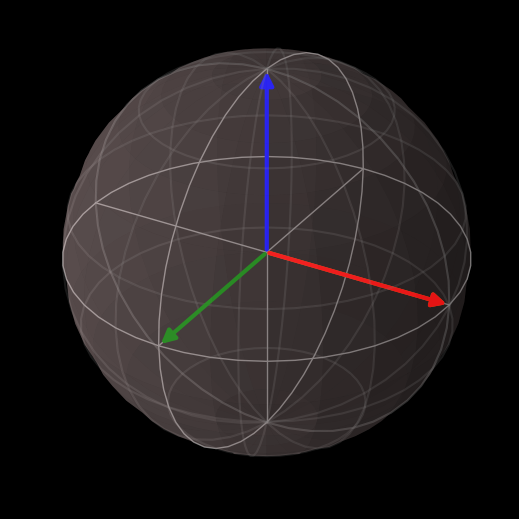

In [113]:
b = Bloch()
x = (basis(2, 0) + (1+0j) * basis(2, 1)).unit()
y = (basis(2, 0) + (0+1j) * basis(2, 1)).unit()
z = (basis(2, 0) + (0+0j) * basis(2, 1)).unit()
result_S = (0.70710678 * basis(2, 0) + (0+0.70710678j) * basis(2, 1)).unit()

# print(y == result_S)

b.add_states([x, y, z, result_S])

b.render()
b

## 双量子比特

### 基矢

In [98]:
bs_00 = tensor(spin_up, spin_up) 
bs_01 = tensor(spin_up, spin_dn) 
bs_10 = tensor(spin_dn, spin_up) 
bs_11 = tensor(spin_dn, spin_dn) 

### 叠加态

In [99]:
sup_1 = tensor(plus_state, spin_dn) 
sup_2 = 0.25 * bs_00 + 0.25 * bs_01 + 0.25 * bs_10 + 0.25 * bs_11

### 算符

In [101]:
sigma_xx = tensor(sigmax(), sigmax())
sigma_xI = tensor(sigmax(), identity(2))
aa_dag = tensor(a, a_dag)
a_daga = tensor(a_dag, a)

### 双光子哈密顿

In [104]:
H = tensor(sigmaz(), identity(2)) + tensor(identity(2), sigmaz()) + 0.05 * sigma_xx

双能级原子与单模光场 （J-C model）

In [107]:
N = 10

omega_a = 1.0

omega_c = 1.25

g = 0.05

a = tensor(identity(2), destroy(N))

sm = tensor(destroy(2), identity(N))

sz = tensor(sigmaz(), identity(N))

H = 0.5 * omega_a * sz + omega_c * a.dag() * a + g * (a.dag() * sm + a * sm.dag())

# print(H)

## 时间演化